<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# Import libraries.
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

### Load the data as a `pandas` data frame.

In [2]:
# Display metadata.
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [0]:
# Define column names.
attributes = ['A{}'.format(x) for x in range(1,17)]

In [0]:
# Load data.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'credit-screening/crx.data', 
                 header=None, names=attributes, 
                 true_values='+', false_values='-', na_values='?')

### Validate that it has the appropriate number of observations.

In [5]:
# Verify:
# Number of Instances - 690
# Number of Attributes - 15 + class attribute
print('Instances: {}\nAttributes: {}'.format(df.shape[0], df.shape[1]))

Instances: 690
Attributes: 16


In [6]:
# Preview first rows.
display(df.head())

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,True
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,True
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,True
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,True
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,True


In [7]:
# Preview last rows.
display(df.tail())

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,False
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,False
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,False
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,False
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,False


### UCI says there should be missing data - check

In [8]:
# Verify:
# Missing Attribute Values - 37 cases (5%) have one or more missing values.
print('Number of rows with missing values: {}'.format(df.isnull().any(axis=1).sum()))

Number of rows with missing values: 37


In [9]:
# Verify: 
# The missing values from particular attributes are
#     A1:  12
#     A2:  12
#     A4:   6
#     A5:   6
#     A6:   9
#     A7:   9
#     A14: 13
display(df.isnull().sum()[df.isnull().sum()!=0])

A1     12
A2     12
A4      6
A5      6
A6      9
A7      9
A14    13
dtype: int64

### Make sure that the loaded features are of the types described above
- continuous values should be treated as float
- correct as necessary

In [10]:
# Summarize data.
display(df.describe(include='all'))

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,False
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


In [11]:
# Check data types.
# Continuous attributes - A2, A3, A8, A11, A14, A15
display(df.dtypes)

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16       bool
dtype: object

In [0]:
# Convert ints to floats, as per instructions above.
df['A11'] = df['A11'].astype(float)
df['A15'] = df['A15'].astype(float)

In [13]:
# Recheck data types.
# Continuous attributes - A2, A3, A8, A11, A14, A15
display(df.dtypes)

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16       bool
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

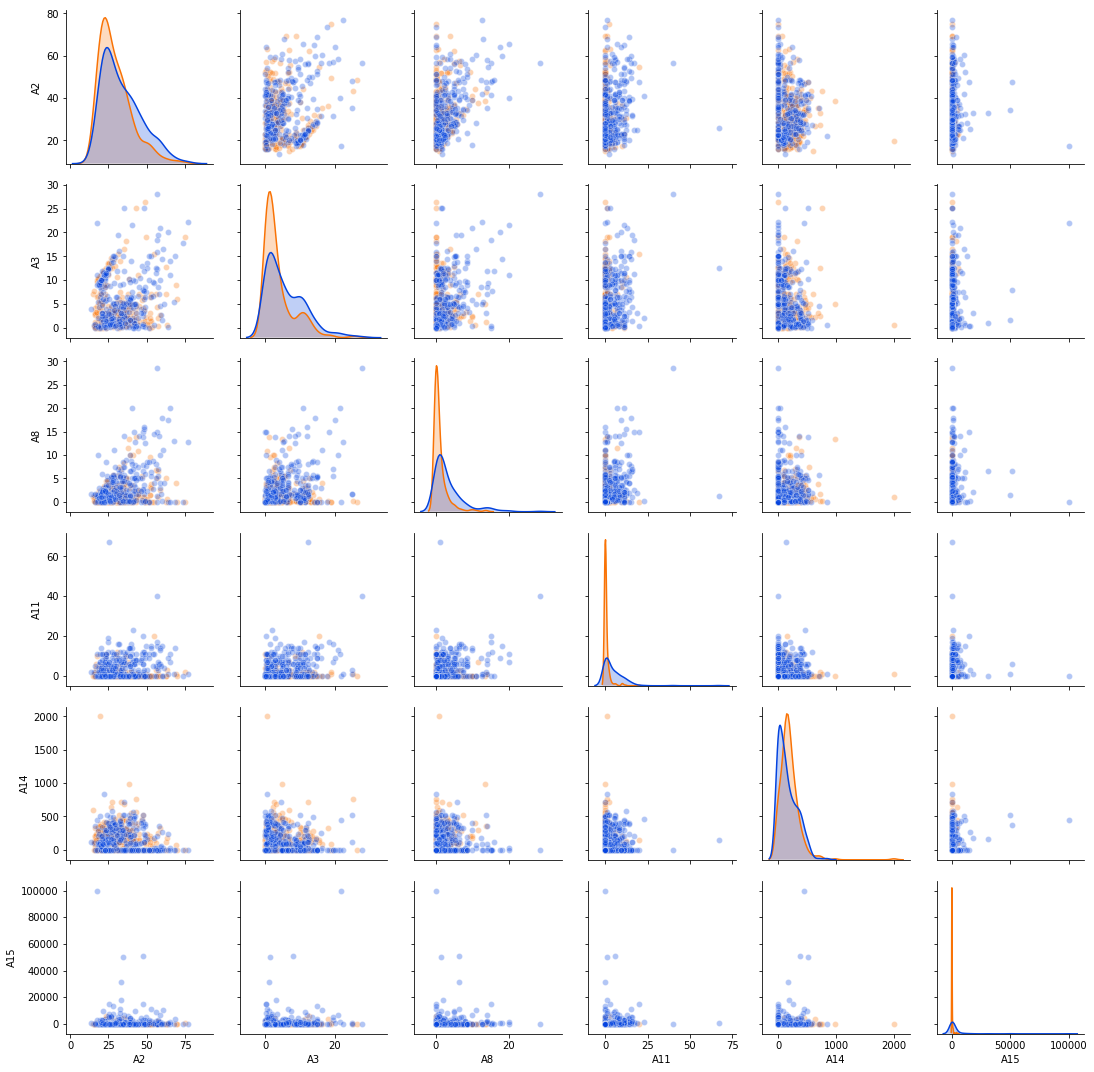

In [14]:
# Create an exploratory pairplot for the continuous attributes.
# Blue for + rows, orange for - ones.
g = sns.pairplot(data=df.dropna(),
                 vars=df.select_dtypes(include='number').columns,
                 hue='A16', palette=sns.xkcd_palette(['orange', 'blue']),
                 diag_kind='kde', plot_kws={'alpha':0.3})
g._legend.remove();

In [0]:
# Split dataframe into two based on target class.
df_rejected = df[df['A16']==False]
df_approved = df[df['A16']==True]

In [16]:
# Verify the above split:
# "A16 (the class attribute) is the most interesting, as it separates the 307 
# approved cases from the 383 rejected cases."
print('Approved: {}\nRejected: {}'.format(df_approved.shape[0], 
                                          df_rejected.shape[0]))

Approved: 307
Rejected: 383


In [17]:
# Perform Welch's t-test, which does not assume equal variance, on the 
# continuous attributes in the dataset.
ttests = []
for column in df.select_dtypes(include='number').columns:
    statistic, pvalue = stats.ttest_ind(df_approved[column], 
                                        df_rejected[column],
                                        equal_var=False, nan_policy='omit')
    ttests.append([column, statistic, pvalue])

ttests = pd.DataFrame(ttests, columns=['attribute', 't-statistic', 'p-value'])
display(HTML(ttests.sort_values('p-value').to_html(index=False)))

attribute,t-statistic,p-value
A11,10.638419,4.310254e-23
A8,8.380060,7.425349e-16
A3,5.392531,1.015881e-07
A2,4.224491,2.767385e-05
A15,4.196600,3.543380e-05
A14,-2.669649,7.777825e-03


In [0]:
# Build contingency matrices for categorical variables.
contingency_matrices = {}
for column in df.select_dtypes(include='object').columns:
    contingency_matrices[column] = pd.crosstab(index=df[column], 
                                               columns=df['A16'])

In [19]:
# Run chi-squared tests.
chi2tests = []
for column in df.select_dtypes(include='object').columns:
  statistic, pvalue, _, _ = stats.chi2_contingency(contingency_matrices[column])
  chi2tests.append([column, statistic, pvalue])

chi2tests = pd.DataFrame(chi2tests, columns=['attribute', 
                                               'chi-squared-statistic', 
                                               'p-value'])
display(HTML(chi2tests.sort_values('p-value').to_html(index=False)))

attribute,chi-squared-statistic,p-value
A9,355.203817,3.118590e-79
A10,143.069562,5.675727e-33
A6,98.325203,3.499930e-15
A7,45.034207,3.625453e-07
A4,26.234075,2.010680e-06
A5,26.234075,2.010680e-06
A13,9.191570,1.009429e-02
A12,0.568273,4.509459e-01
A1,0.311283,5.768938e-01


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

 ### Interpret and explain the two t-tests you ran
 - What do they tell you about the relationships between the continuous features you selected and the class labels?

In [20]:
# Display t-test results.
display(HTML(ttests[ttests['attribute'].isin(['A11', 'A14'])].to_html(index=False)))

attribute,t-statistic,p-value
A11,10.638419,4.310254e-23
A14,-2.669649,7.777825e-03


/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


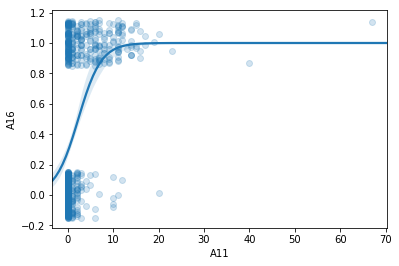

In [21]:
# Show logistic regression plot for A11.
sns.regplot(x='A11', y='A16', data=df.dropna(subset=['A11']), logistic=True,
           scatter_kws={'alpha':0.2}, y_jitter=0.15);

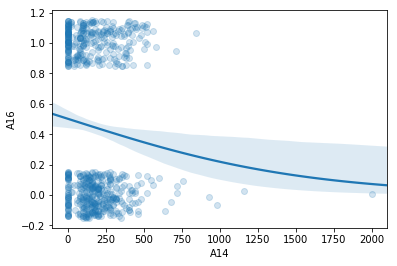

In [22]:
# Show logistic regression plot for A14.
sns.regplot(x='A14', y='A16', data=df.dropna(subset=['A11']), logistic=True,
           scatter_kws={'alpha':0.2}, y_jitter=0.15);

In the given sample, higher values for attribute A11 are associated with an increased probability of credit approval, while the opposite is true for attribute A16 - there higher values are associated with a *decreased* probability of approval. In both cases, the probability that the observed association is an artifact of random chance is less than 1%, but this probability is nonetheless much lower for A11 than it is for A16.

### Interpret and explain the two Chi-squared tests you ran 
- What do they tell you about the relationships between the categorical features you selected and the class labels?

In [23]:
# Display chi-squared test results.
display(HTML(chi2tests[chi2tests['attribute'].isin(['A9', 'A1'])].to_html(index=False)))

attribute,chi-squared-statistic,p-value
A1,0.311283,5.768938e-01
A9,355.203817,3.118590e-79


### What was the most challenging part of this sprint challenge?